# Self-Organizing Map (SOM) for Face Image Clustering
In this notebook, we will explore how to use a Self-Organizing Map (SOM) to cluster face images. The code provided performs the following tasks:

# 1. Import Necessary Libraries

In [ ]:
# We start by importing the required Python libraries for this project: numpy for numerical operations, fetch_olivetti_faces from sklearn.
# datasets to load face image data, MinMaxScaler for data normalization, and matplotlib for visualization.

import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 2. Load Face Image Data

In [ ]:
# Here, the fetch_olivetti_faces dataset is loaded using scikit-learn's fetch_olivetti_faces() function, and data in faces.

data = fetch_olivetti_faces(shuffle=True, random_state=42)
faces = data.data
# Shuffle data
np.random.shuffle(faces)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


# 3. show some imgae of dataset

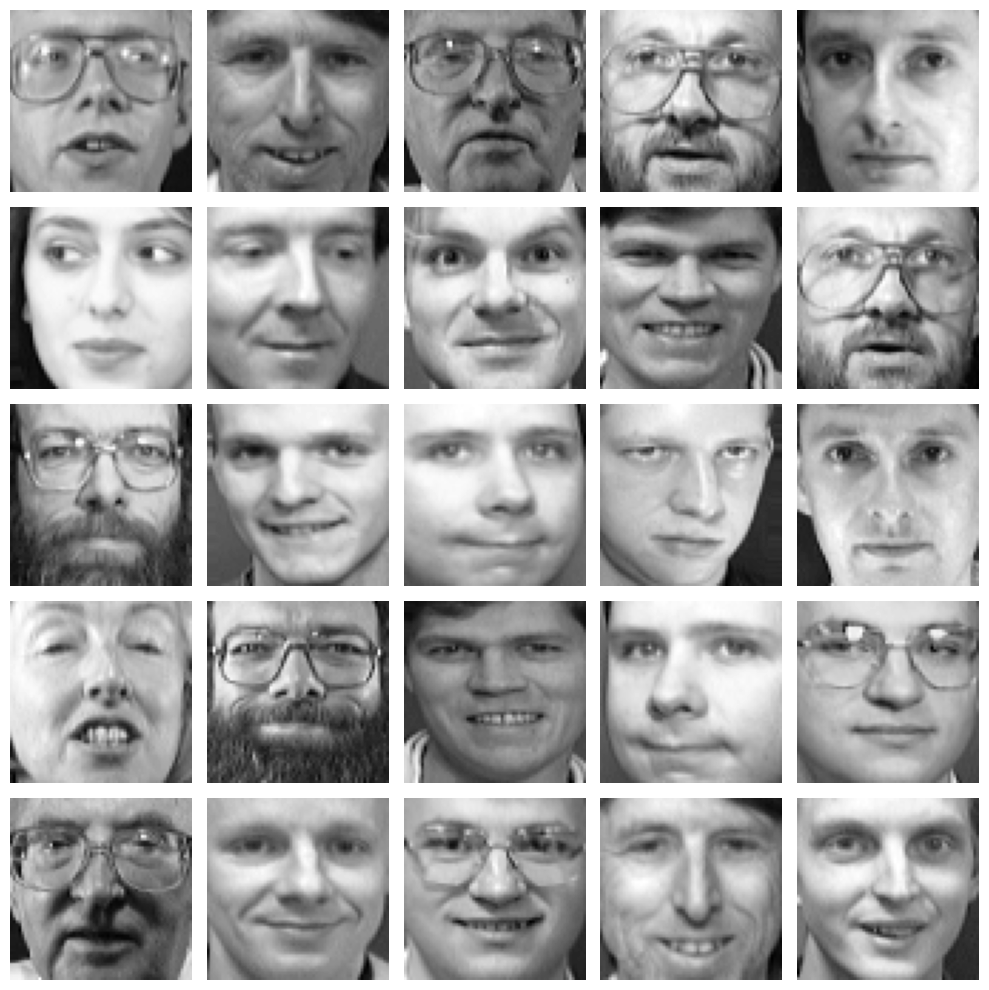

In [ ]:
# In this block, show 25 image from dataset
num_images_to_show = 25
# Display the selected images in a 5x5 grid
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
for i in range(num_images_to_show):
    plt.subplot(5, 5, i + 1)
    plt.imshow(faces[i].reshape(64, 64), cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

# 4. Normalize the Data

In [ ]:
# The face image data is then normalized to the range [0, 1] using MinMaxScaler to ensure that all features have the same scale.

scaler = MinMaxScaler()
faces_normalized = scaler.fit_transform(faces)

# 5. Define SOM Parameters and Initialize the SOM

In [ ]:
# The parameters of the self-organizing map (SOM) are determined, and initialize the SOM

epochs = 500
num_neurons = 100  # Number of neurons in the SOM
learning_rate = 0.1
input_dim = faces_normalized.shape[1]  # Input dimension (number of features)

# Initialize SOM weights
weights = np.random.random(size=(num_neurons, input_dim))

# 6. Finding the Best Matching Unit

In [ ]:
# This function calculates the Euclidean distances between the SOM weights and the input data and returns the BMU coordinates.

def find_best_matching_unit(weights, x):
    # Calculate the Euclidean distances between the `weights` and `x`
    # Find the index of the minimum distance
    distances = np.linalg.norm(weights - x, axis=1)
    # Find the index of the minimum distance
    min_index = np.argmin(distances)
    bmu = np.argmin(distances)

    return bmu

# 7. Train the SOM

In [ ]:
# The SOM is trained by iterating through the data points and updating weights.
# For each epoch, the BMU is found for each data point, and the weights of the neighborhood are updated.
# The learning rate is decayed in each epoch.

for epoch in range(epochs):
    for face in faces_normalized:
        # Find the best matching unit (BMU)
        bmu_idx = find_best_matching_unit(weights, face)
        # Calculate the distance of each cell from the other cells. Then, if the distance is more than 5, update the weight according to the learning rate.

        # Update the BMU and its neighbors
        for i in range(num_neurons):
            distance = np.linalg.norm(np.array([i]) - np.array([bmu_idx]))
            if distance < 5:  # Adjust the neighborhood size as needed
                weights[i] += learning_rate * (face - weights[i])



# 8. Visualize

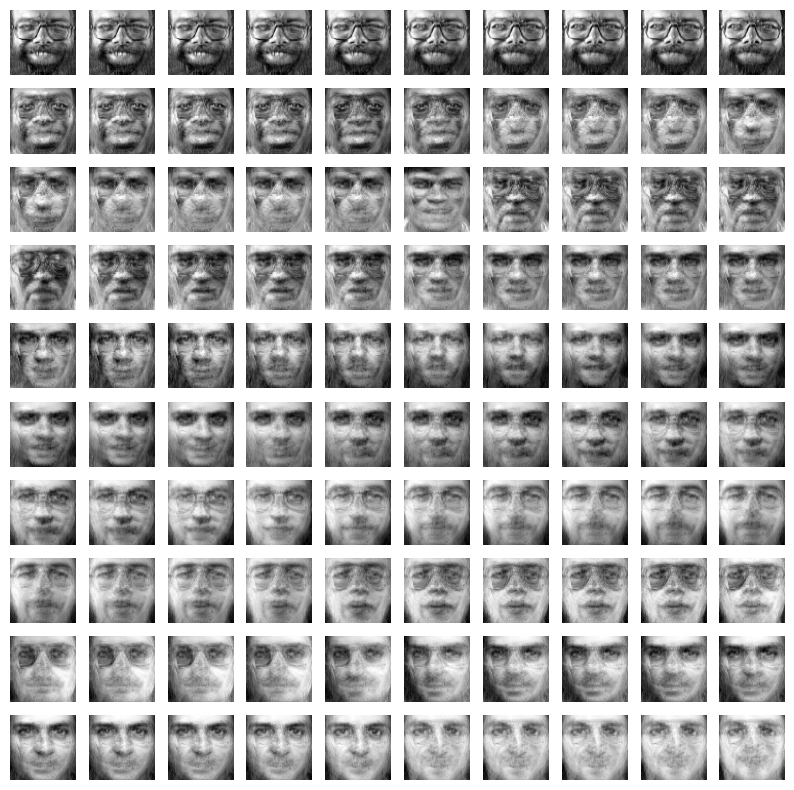

In [ ]:
# Finally, the code visualizes the learned SOM. It creates a 5x5 grid of subplots and displays the SOM neurons as images.

plt.figure(figsize=(10, 10))
for i, face in enumerate(weights):
    plt.subplot(10, 10, i + 1)
    plt.imshow(face.reshape(64, 64), cmap='gray')
    plt.axis('off')

plt.show()